# Feature engineering

http://www.feat.engineering/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
np.random.seed(0)

## Полиномизация

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [16]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [17]:
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

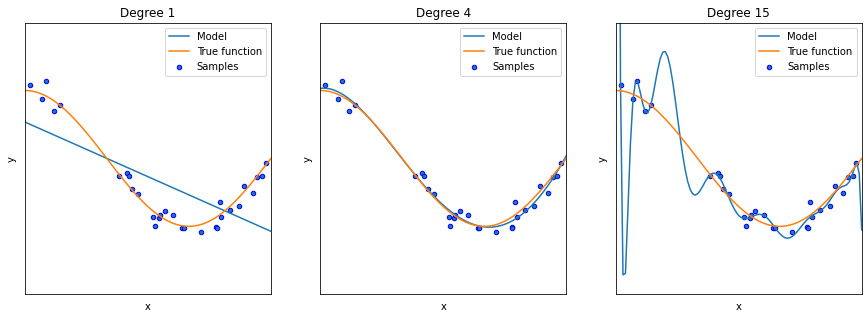

In [18]:
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, y_test, label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}")

plt.show()

## Биннинг
Дискретизация вещественных признаков

### FunctionTransformer + pd.cut

In [20]:
from sklearn.preprocessing import FunctionTransformer

In [21]:
age_data = np.random.randint(18, 80, size=15)
age_data

array([59, 53, 18, 49, 23, 48, 18, 67, 68, 54, 52, 66, 47, 21, 52])

In [22]:
bins = [18, 23, 30, 45, 59, np.inf]
labels = ['student', 'young_specialist', 'specialist', 'adult', 'senior citizen']

In [23]:
transformer = FunctionTransformer(
    func=pd.cut,
    kw_args={'bins': bins, 'labels': labels, 'retbins': False},
)
transformer.fit_transform(age_data)

['adult', 'adult', NaN, 'adult', 'student', ..., 'adult', 'senior citizen', 'adult', 'student', 'adult']
Length: 15
Categories (5, object): ['student' < 'young_specialist' < 'specialist' < 'adult' < 'senior citizen']

### KBinsDiscretizer

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

In [26]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
kbins.fit_transform(age_data.reshape(-1, 1))

array([[4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [0.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [2.],
       [0.],
       [3.]])

In [27]:
kbins.bin_edges_

array([array([18., 28., 38., 48., 58., 68.])], dtype=object)